In [2]:
#This code calculate the packing comtacts. 0.2 ns frame was considered as the reference structure. Also this code save the contacts in 0.2 ns frame into a separate file.

import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import itertools

def packing_distances(traj,topology,file_name):
    t = md.load(traj,top=topology)
    
    group1 = []
    group2 = []
    chainA = np.arange(0,44)
    chainB = np.arange(44,88)
    chainC = np.arange(88,132)
    chainD = np.arange(132,176)
    chainE = np.arange(176,220)
    chainF = np.arange(220,264)
    chainG = np.arange(264,308)
    chainH = np.arange(308,352)
    chainI = np.arange(352,396)
    chainJ = np.arange(396,440)
    

    for i in range(len(chainA)):
        group1.append(chainA[i])

    for i in range(len(chainB)):
        group2.append(chainB[i])

    for i in range(len(chainC)):
        group1.append(chainC[i])

    for i in range(len(chainD)):
        group2.append(chainD[i])

    for i in range(len(chainE)):
        group1.append(chainE[i])

    for i in range(len(chainF)):
        group2.append(chainF[i])    

    for i in range(len(chainG)):
        group1.append(chainG[i])

    for i in range(len(chainH)):
        group2.append(chainH[i])

    for i in range(len(chainI)):
        group1.append(chainI[i])

    for i in range(len(chainJ)):
        group2.append(chainJ[i])

    pairs = list(itertools.product(group1,group2))
    contacts = md.compute_contacts(t,pairs,scheme='closest-heavy')

    file =file_name
    write_mode= "w"
    _out = open(file,write_mode)

    for i in range(len(pairs)):
        if i < len(pairs)-1:
            _out.write(str(pairs[i][0])+"-"+str(pairs[i][1])+",")
        else:
            _out.write(str(pairs[i][0])+"-"+str(pairs[i][1]))
    _out.write("\n")

    for i in range(len(contacts[0])):
        for j in range(len(contacts[0][0])):
            if j < len(contacts[0][0])-1:
                _out.write(str(contacts[0][i][j])+',')
            else:
                _out.write(str(contacts[0][i][j]))
        _out.write("\n")

    _out.close()

def contacts(distance,i = 0):
    contacts=[]
    for j in range(len(distance[0])):
        if (distance[i][j] <= .45):
            contacts.append(1)
        else:
            contacts.append(0)
    
    number_contact = sum(contacts)
    return number_contact

def contacts_over_time(distances):
    distance = np.loadtxt(distances,delimiter=",",skiprows=1)
    over_time = []
    for i in range(len(distance)):
        total = contacts(distance,i)
        over_time.append(total)
    return over_time

def native_contacts(data):
    distance = np.loadtxt(data, delimiter=',', skiprows=1)
    over_time = []
    contacts = []
    native_columns = []
    
    for j in range(len(distance[0][:])):
        if distance[1][j] <= 0.45:
            native_columns.append(j)

    for i in range(len(distance)):
        for j in native_columns:
            if distance[i][j] <= 0.45:
                contacts.append(1)
            else:
                contacts.append(0)

        number_contact = sum(contacts)
        over_time.append(number_contact)
        contacts = []
    
    return over_time

def save_packing_contacts_second_frame(data, output_file):
    distance = np.loadtxt(data, delimiter=',', skiprows=1)
    pairs = np.loadtxt(data, delimiter=',', max_rows=1, dtype=str)
    
    with open(output_file, "w") as file:
        for j in range(len(distance[0])):
            if distance[1][j] <= 0.45:
                file.write(f"{pairs[j]},{distance[1][j]}\n")

trajectory = '../../7q4b_t1_new.xtc'
topology = '../7q4b_fibril_edited_res_index.gro'
file_name = 'contact_list_in_second_frame/7q4b_t1_packing_distances.csv'
file_name2 = 'contact_list_in_second_frame/7q4b_t1_packing_contacts.csv'
file_name3 = 'contact_list_in_second_frame/7q4b_t1_packing_native_contacts.csv'
file_name4 = 'contact_list_in_second_frame/7q4b_t1_packing_contacts_second_frame.csv'

packing_distances(trajectory,topology,file_name)

x = contacts_over_time(file_name)
time_scale = 200

file = open(file_name2,"w")
for i in range(len(x)):
    file.write(str(i*time_scale/1000)+","+str(x[i]))
    file.write("\n")
file.close()

native = native_contacts(file_name)
file = open(file_name3,"w")
for i in range(len(native)):
    file.write(str(i*time_scale/1000)+","+str(native[i]))
    file.write("\n")
file.close()

save_packing_contacts_second_frame(file_name, file_name4)


In [1]:
#This code calculate the packing contacts. Common contacts between fibril and 0.2 ns frame were considered as native contacts. Also this code save the contacts in 0.2 ns frame into a separate file.

import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import itertools
import pandas as pd

def packing_distances(traj, topology, file_name):
    t = md.load(traj, top=topology)
    
    group1 = []
    group2 = []
    chainA = np.arange(0, 44)
    chainB = np.arange(44, 88)
    chainC = np.arange(88, 132)
    chainD = np.arange(132, 176)
    chainE = np.arange(176, 220)
    chainF = np.arange(220, 264)
    chainG = np.arange(264, 308)
    chainH = np.arange(308, 352)
    chainI = np.arange(352, 396)
    chainJ = np.arange(396, 440)
    
    for i in chainA:
        group1.append(i)
    for i in chainB:
        group2.append(i)
    for i in chainC:
        group1.append(i)
    for i in chainD:
        group2.append(i)
    for i in chainE:
        group1.append(i)
    for i in chainF:
        group2.append(i)    
    for i in chainG:
        group1.append(i)
    for i in chainH:
        group2.append(i)
    for i in chainI:
        group1.append(i)
    for i in chainJ:
        group2.append(i)

    pairs = list(itertools.product(group1, group2))
    contacts = md.compute_contacts(t, pairs, scheme='closest-heavy')

    with open(file_name, "w") as _out:
        _out.write(",".join([f"{p[0]}-{p[1]}" for p in pairs]) + "\n")
        for frame in contacts[0]:
            _out.write(",".join(map(str, frame)) + "\n")

def contacts(distance, i=0):
    contacts = []
    for j in range(len(distance[0])):
        if distance[i][j] <= 0.45:
            contacts.append(1)
        else:
            contacts.append(0)
    
    number_contact = sum(contacts)
    return number_contact

def contacts_over_time(distances):
    distance = np.loadtxt(distances, delimiter=",", skiprows=1)
    over_time = []
    for i in range(len(distance)):
        total = contacts(distance, i)
        over_time.append(total)
    return over_time

def native_contacts(data, native_contacts_file):
    distance = np.loadtxt(data, delimiter=',', skiprows=1)
    pairs = np.loadtxt(data, delimiter=',', max_rows=1, dtype=str)
    
    # Read native contacts from file
    native_contacts = pd.read_csv(native_contacts_file)
    native_contacts_set = set(native_contacts.iloc[:, 0])  # First column contains pairs like '10-17'
    
    native_indices = []
    for i, pair in enumerate(pairs):
        if pair in native_contacts_set:
            native_indices.append(i)
    
    over_time = []
    for i in range(len(distance)):
        contacts = []
        for j in native_indices:
            if distance[i][j] <= 0.45:
                contacts.append(1)
            else:
                contacts.append(0)
        number_contact = sum(contacts)
        over_time.append(number_contact)
    
    return over_time

def save_packing_contacts_second_frame(data, output_file):
    distance = np.loadtxt(data, delimiter=',', skiprows=1)
    pairs = np.loadtxt(data, delimiter=',', max_rows=1, dtype=str)
    
    with open(output_file, "w") as file:
        for j in range(len(distance[0])):
            if distance[1][j] <= 0.45:
                file.write(f"{pairs[j]},{distance[1][j]}\n")

# File paths
trajectory = '../../7q4b_t1_new.xtc'
topology = '../7q4b_fibril_edited_res_index.gro'
file_name = 'packing_contacts_according_to_common_frames/7q4b_t1_packing_distances.csv'
file_name2 = 'packing_contacts_according_to_common_frames/7q4b_t1_packing_contacts.csv'
file_name3 = 'packing_contacts_according_to_common_frames/7q4b_t1_packing_native_contacts.csv'
file_name4 = 'packing_contacts_according_to_common_frames/7q4b_t1_packing_contacts_second_frame.csv'
native_contacts_file = 'contact_list_in_second_frame/7q4b_t1_common_contacts_fibril_0.2.csv'  # New file for native contacts

# Calculate packing distances
packing_distances(trajectory, topology, file_name)

# Calculate total contacts over time
x = contacts_over_time(file_name)
time_scale = 200
with open(file_name2, "w") as file:
    for i in range(len(x)):
        file.write(f"{i * time_scale / 1000},{x[i]}\n")

# Calculate native contacts using the external file
native = native_contacts(file_name, native_contacts_file)
with open(file_name3, "w") as file:
    for i in range(len(native)):
        file.write(f"{i * time_scale / 1000},{native[i]}\n")

# Save packing contacts from the second frame
save_packing_contacts_second_frame(file_name, file_name4)


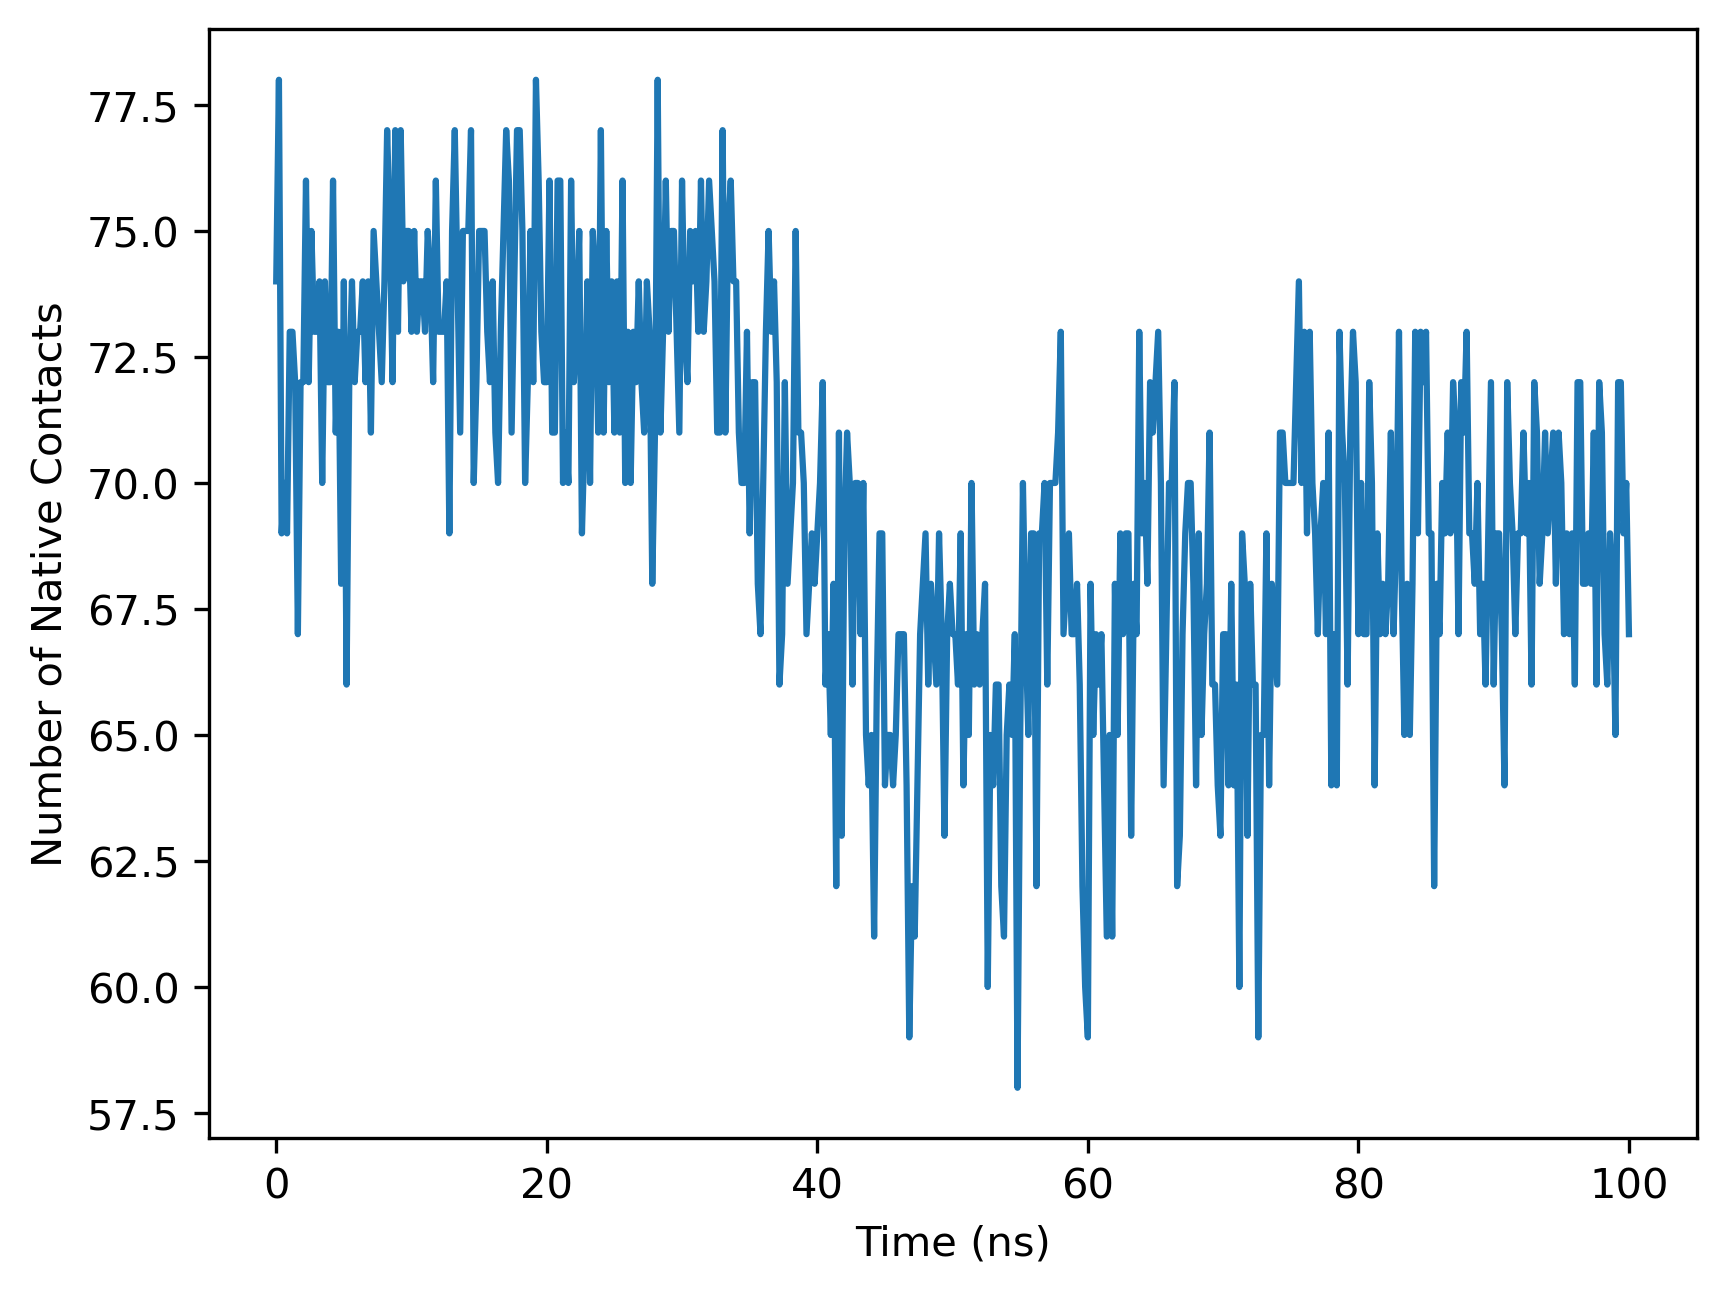

In [8]:
import numpy as np
import matplotlib.pyplot as plt

f = np.loadtxt('packing_contacts_according_to_common_frames/7q4b_t1_packing_native_contacts.csv', delimiter=',')

time = f[:, 0]
contacts = f[:, 1]

plt.figure(dpi=300)
plt.plot(time, contacts)
plt.xlabel('Time (ns)')  # Corrected spelling
plt.ylabel('Number of Native Contacts')  # Corrected spelling
plt.show()
